In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

In [3]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_columns=list(df.columns)

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df=df.drop('Loan_ID',axis=1)

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 1.Exploratory Data Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

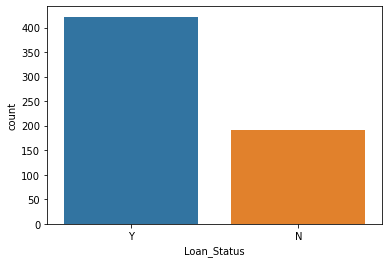

In [10]:
sns.countplot(x='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

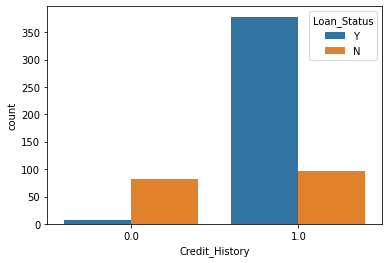

In [11]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')
# Loan was not given to most people who got Credit History = 0
# but loan was given to most of people who got Credit History = 1
# so it can be said that if you got Credit History = 1 , you will have better chance to get a loan

<AxesSubplot:xlabel='Gender', ylabel='count'>

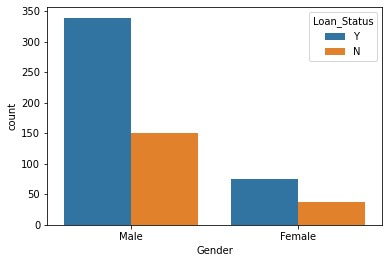

In [12]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
# most males got loan and most females got one too so (No pattern)

<AxesSubplot:xlabel='Married', ylabel='count'>

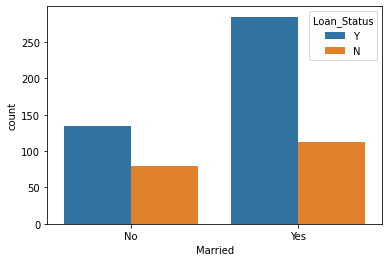

In [13]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
# most people who get married did get a loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

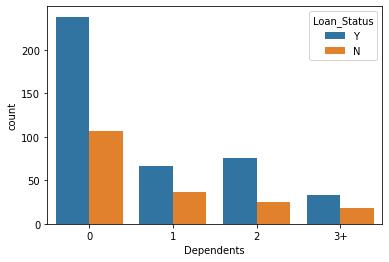

In [14]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')
# If Dependents = 0 , there is a higher chance to get a loan 

<AxesSubplot:xlabel='Education', ylabel='count'>

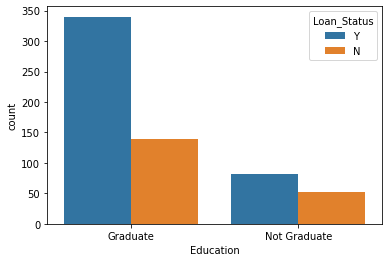

In [15]:
sns.countplot(x='Education',data=df,hue='Loan_Status') 
# Here it can be seen that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

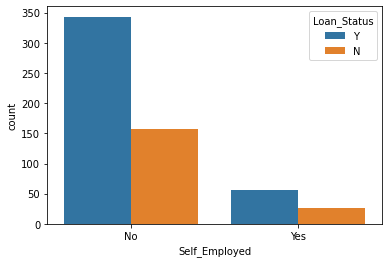

In [16]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status') 
# No pattern (same as Education)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

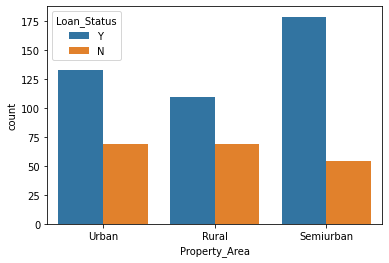

In [17]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
# Semiurban Property_Area got more than higher chance to get a loan

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

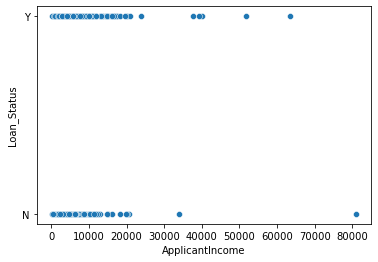

In [18]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df)
# No pattern

In [19]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
continuous_features=[feature for feature in numerical_features if df[feature].nunique()>15]
discrete_features=[feature for feature in numerical_features if df[feature].nunique()<15]

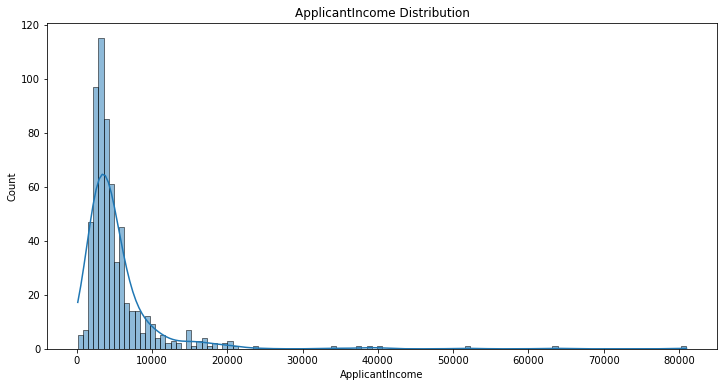

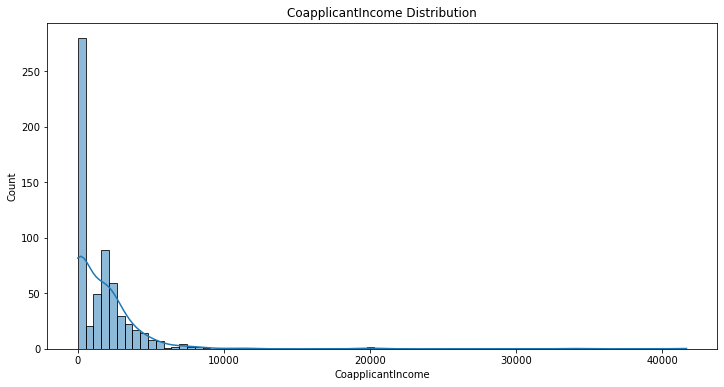

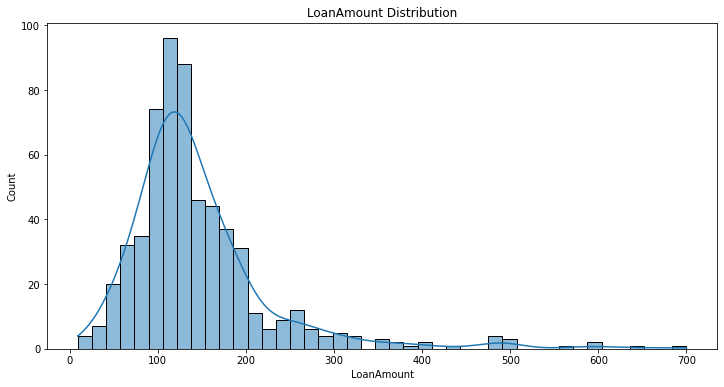

In [20]:
for feature in continuous_features:
    plt.figure(figsize=(12,6))
    sns.histplot(data = df, x=feature,kde=True)
    plt.title(f"{feature} Distribution");

# 2.Dealing with missing values and outliers

In [21]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [24]:
percent_missing(df)

Married             0.488599
Gender              2.117264
Loan_Amount_Term    2.280130
Dependents          2.442997
LoanAmount          3.583062
Self_Employed       5.211726
Credit_History      8.143322
dtype: float64

In [25]:
#it can be seen that all the columns except Credit_history have less than 5 percent of null value
#can be easily be substituted by suitable central tendacy 
#in case of categorical and discrete mode will be suitable
#while for continous values boxplot can be used to make the decision.

for feature in discrete_features:
    df[feature].fillna(df[feature].mode()[0],inplace=True)
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0],inplace=True)    

In [26]:
percent_missing(df)

LoanAmount    3.583062
dtype: float64

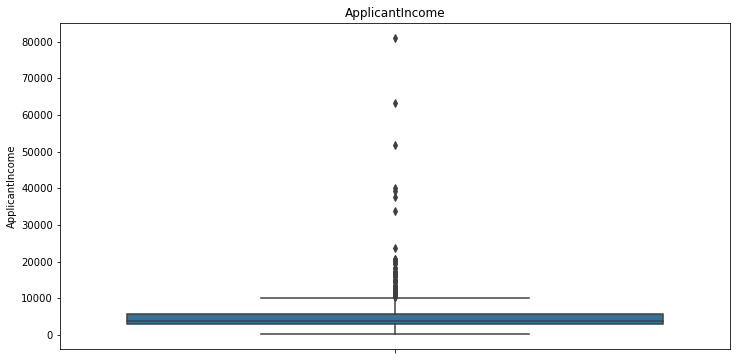

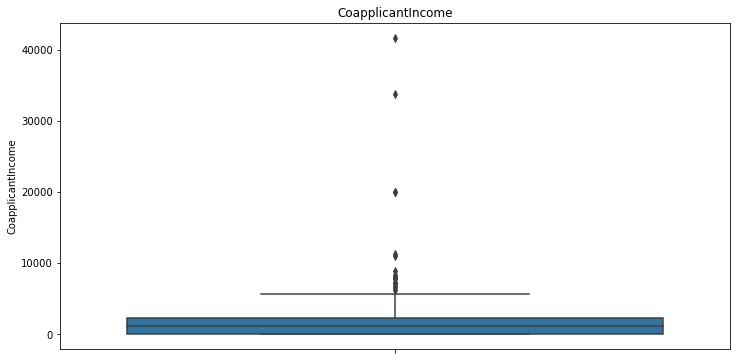

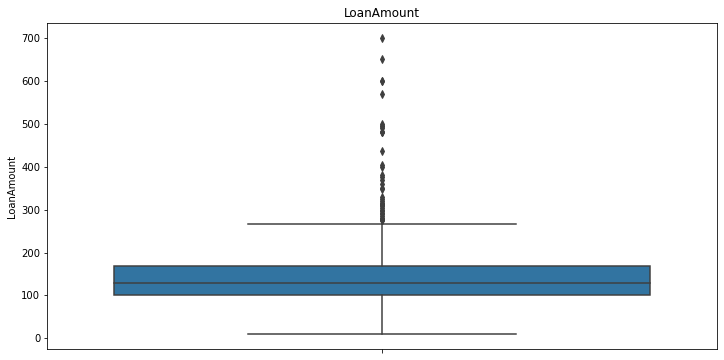

In [27]:
for feature in continuous_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(data = df, y=feature)
    plt.title(feature)

In [28]:
#since there are large numbers of outliers,some of them has to be removed and the null values will be filled with median.
df=df.drop(df[df['ApplicantIncome']>20000].index)

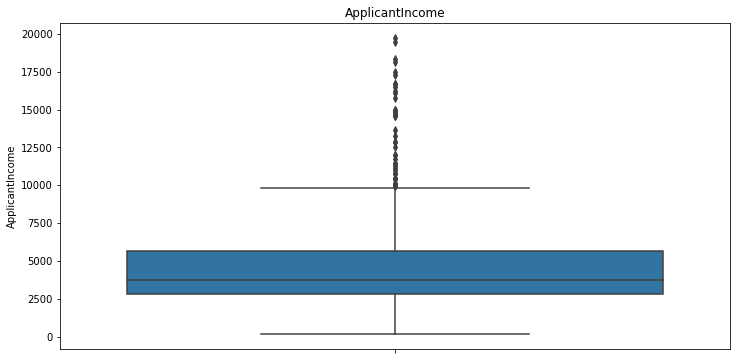

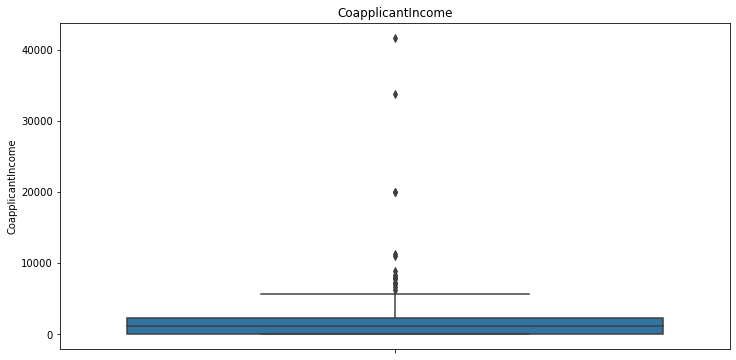

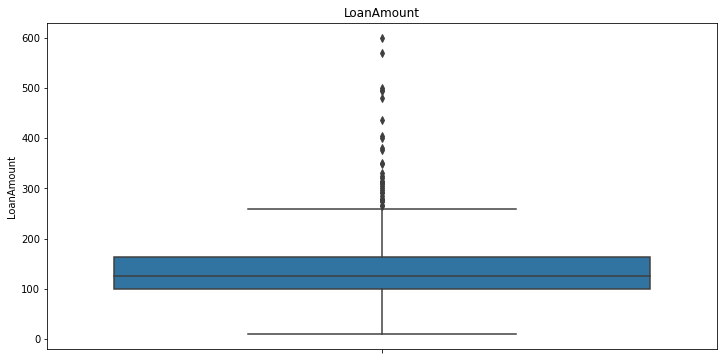

In [29]:
for feature in continuous_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(data =df, y=feature)
    plt.title(feature)

In [30]:
for feature in continuous_features:
    df[feature].fillna(df[feature].median(),inplace=True)

In [31]:
# No more missing data.
percent_missing(df)

Series([], dtype: float64)

# 3.Scaling the data and performing the train-test-split

In [32]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [33]:
X=pd.get_dummies(X,drop_first=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [35]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# 4.Testing out different models

In [36]:
def model_results(model):
    preds=model.predict(scaled_X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,scaled_X_test,y_test)

# Logistic Regression Model

In [37]:
log_model=LogisticRegression(random_state=101)
log_model.fit(scaled_X_train,y_train)

LogisticRegression(random_state=101)

              precision    recall  f1-score   support

           N       0.93      0.49      0.64        51
           Y       0.83      0.98      0.90       130

    accuracy                           0.85       181
   macro avg       0.88      0.74      0.77       181
weighted avg       0.86      0.85      0.83       181



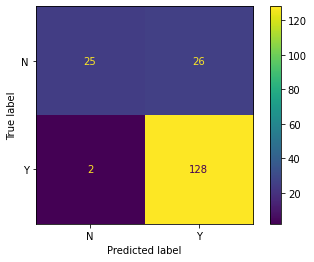

In [38]:
model_results(log_model)

# KNN model

In [39]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           N       0.83      0.47      0.60        51
           Y       0.82      0.96      0.89       130

    accuracy                           0.82       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.82      0.82      0.81       181



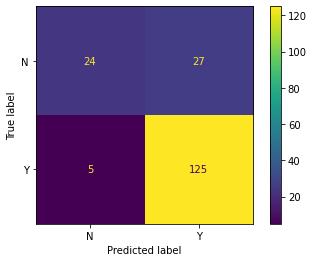

In [40]:
model_results(knn_model)

# SVC model

In [41]:
svc_model=SVC()
param_grid={'C':[0.001,0.01,0.1,0.5,1],
            'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],
             'degree':[2,3,4]}
grid_model=GridSearchCV(svc_model,param_grid=param_grid)
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
grid_model.best_estimator_

SVC(C=0.01, degree=2, kernel='linear')

              precision    recall  f1-score   support

           N       0.96      0.47      0.63        51
           Y       0.83      0.99      0.90       130

    accuracy                           0.85       181
   macro avg       0.89      0.73      0.77       181
weighted avg       0.86      0.85      0.83       181



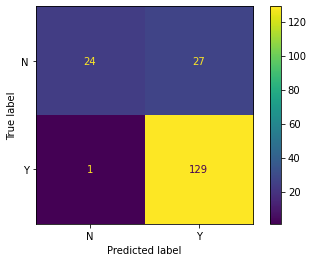

In [43]:
model_results(grid_model)

# Random Forest model

In [44]:
rf_model=RandomForestClassifier(random_state=101)
param_grid={'n_estimators':[32,64,100,128,200],
            'max_features':['sqrt','log2'],
            'criterion':['gini','entropy']}
grid_model=GridSearchCV(estimator=rf_model,
                        param_grid=param_grid)
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [32, 64, 100, 128, 200]})

In [45]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=64, random_state=101)

              precision    recall  f1-score   support

           N       0.80      0.47      0.59        51
           Y       0.82      0.95      0.88       130

    accuracy                           0.82       181
   macro avg       0.81      0.71      0.74       181
weighted avg       0.82      0.82      0.80       181



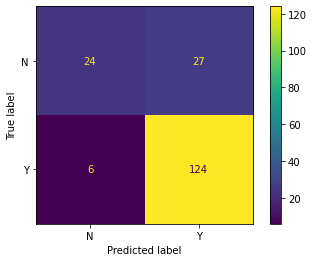

In [46]:
model_results(grid_model)

# GradientBoosting model

In [47]:
gradient_boost_model=GradientBoostingClassifier(random_state=101)
param_grid={'n_estimators':[50,100,150,200],
            'max_depth':[2,3,4],
            'learning_rate':[0.01,0.05,0.1,0.02]}
grid_model=GridSearchCV(estimator=gradient_boost_model,
                        param_grid=param_grid)
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.02],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]})

In [48]:
grid_model.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=50,
                           random_state=101)

              precision    recall  f1-score   support

           N       0.96      0.45      0.61        51
           Y       0.82      0.99      0.90       130

    accuracy                           0.84       181
   macro avg       0.89      0.72      0.76       181
weighted avg       0.86      0.84      0.82       181



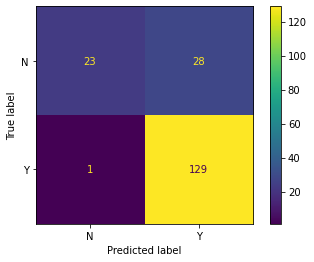

In [49]:
model_results(grid_model)

# Training on the entire dataset

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipe = Pipeline([('scaler',StandardScaler()),('log_model',LogisticRegression(random_state=101))])
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression(random_state=101))])

In [53]:
df_columns=df_columns[:-1]

In [55]:
import joblib
joblib.dump(pipe,'Loan_Predictions.pkl')
joblib.dump(df_columns,'lp_column_names.pkl')

['lp_column_names.pkl']

In [56]:
loaded_model=joblib.load('Loan_Predictions.pkl')

In [57]:
loaded_model.predict([list(X.iloc[10])])

array(['Y'], dtype=object)

In [58]:
y.iloc[10]

'Y'